# 个贷违约预测

## 1.项目内容
利用个人贷款违约记录数据 (data.csv，字段描述见表1)，进行个贷违约预测，主要进行数据预处理、数据集划分、模型方法实践、模型参数选择和模型效果比较，重点实践决策树、逻辑回归和朴素贝叶斯三个算法。作业要求提交完整的实验报告，包括文字叙述、代码和运行结果。

数据字段及具体含义如下：

- loan_id: 贷款ID
- user_id: 借款人ID
- total_loan: 贷款数额
- year_of_loan: 贷款年限
- interest: 当前贷款利率"%"
- monthly_payment: 分期付款金额
- class: 贷款级别
- employer_type: 所在公司类型
- industry: 工作领域
- work_year: 工作年限
- house_exist: 是否有房
- issue_date: 贷款发放的月份
- use: 用途类型
- debt_loan_ratio: 债务收入比
- del_in_18month: 借款人过去18个月逾期30天以上的违约事件数
- known_oustanding_loan: 借款人档案中未结信用额度的数量
- known_dero: 贬损公共记录的数量
- pub_dero_bankrup: 公开记录清除的数量
- early_return: 借款人提前还款次数
- early_return_amount: 借款人提前还款累积金额
- early_return_amount_3mon: 近3个月内提前还款金额
- isDefault: 是否违约

## 2. 数据探索分析与预处理
### 2.1 导入数据

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('D:/大四上/数据挖掘与商业分析/作业1/data.csv')
print('数据集维度：',data.shape)

数据集维度： (10000, 22)


### 2.2 查看数据

In [2]:
# 查看前5行
data.head()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,use,debt_loan_ratio,del_in_18month,known_outstanding_loan,known_dero,pub_dero_bankrup,early_return,early_return_amount,early_return_amount_3mon,isDefault
0,1040418,240418,31818.18182,3,11.466,1174.91,C,政府机构,金融业,3 years,...,2,2.430000,0,3,0,0.0,3,9927,0.0,0
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,...,0,11.004545,1,3,0,0.0,0,0,0.0,0
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,...,4,6.409091,0,5,0,0.0,0,0,0.0,0
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,...,0,9.204545,0,3,0,0.0,0,0,0.0,0
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,0,15.578182,0,15,0,0.0,0,0,0.0,0


In [3]:
# 查看后5行
data.tail()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,use,debt_loan_ratio,del_in_18month,known_outstanding_loan,known_dero,pub_dero_bankrup,early_return,early_return_amount,early_return_amount_3mon,isDefault
9995,1028093,228093,17727.27273,3,15.037,510.27,B,普通企业,建筑业,7 years,...,4,10.483636,0,9,0,0.0,2,5287,0.0,0
9996,1043911,243911,13636.36364,3,6.534,464.95,A,政府机构,农、林、牧、渔业,2 years,...,0,0.654545,0,4,0,0.0,3,7182,0.0,0
9997,1023503,223503,24818.18182,3,14.421,708.69,B,普通企业,信息传输、软件和信息技术服务业,10+ years,...,4,20.421818,1,9,0,0.0,1,8540,2562.0,0
9998,1024616,224616,20000.00000,3,18.450,727.58,D,政府机构,农、林、牧、渔业,10+ years,...,2,14.048182,0,11,0,0.0,2,6161,616.1,0
9999,1021034,221034,1000.00000,3,14.014,33.57,C,高等教育机构,信息传输、软件和信息技术服务业,7 years,...,0,3.280000,0,5,0,0.0,3,299,59.8,0


In [4]:
# 查看数据集维度
data.shape

(10000, 22)

In [5]:
# 浏览数据集整体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   10000 non-null  int64  
 1   user_id                   10000 non-null  int64  
 2   total_loan                10000 non-null  float64
 3   year_of_loan              10000 non-null  int64  
 4   interest                  10000 non-null  float64
 5   monthly_payment           10000 non-null  float64
 6   class                     10000 non-null  object 
 7   employer_type             10000 non-null  object 
 8   industry                  10000 non-null  object 
 9   work_year                 9378 non-null   object 
 10  house_exist               10000 non-null  int64  
 11  issue_date                10000 non-null  object 
 12  use                       10000 non-null  int64  
 13  debt_loan_ratio           10000 non-null  float64
 14  del_in_

In [6]:
# 查看数据集统计信息
data.describe()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,house_exist,use,debt_loan_ratio,del_in_18month,known_outstanding_loan,known_dero,pub_dero_bankrup,early_return,early_return_amount,early_return_amount_3mon,isDefault
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9993.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.025210e+06,225209.587700,14402.126591,3.479600,13.222782,436.960427,0.612200,1.762600,17.532170,0.311600,11.645000,0.226400,0.138997,1.290600,2173.916100,335.232240,0.168300
std,1.438682e+04,14386.820956,8953.946807,0.853965,4.875755,261.754396,0.672203,2.392031,14.218509,0.872457,5.500745,0.607931,0.379089,1.449469,3027.539977,635.108825,0.374151
min,1.000008e+06,200008.000000,818.181818,3.000000,4.779000,30.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.012973e+06,212973.250000,7500.000000,3.000000,9.702000,248.820000,0.000000,0.000000,11.157955,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.025276e+06,225276.500000,12272.727270,3.000000,12.639000,371.525000,1.000000,0.000000,16.652273,0.000000,11.000000,0.000000,0.000000,1.000000,838.500000,0.000000,0.000000
75%,1.037694e+06,237694.500000,19636.363640,3.000000,15.985500,573.830000,1.000000,4.000000,22.781591,0.000000,14.000000,0.000000,0.000000,3.000000,3354.250000,413.675000,0.000000
max,1.049997e+06,249997.000000,47272.727270,5.000000,33.979000,1503.890000,4.000000,13.000000,999.000000,15.000000,59.000000,12.000000,5.000000,5.000000,18413.000000,5523.900000,1.000000


### 2.3 检查数据质量
针对数据可能存在的“不完整、不正确、不一致”问题，重点检查以下几个维度：<br>
* 不完整：查看缺失值；<br>
* 不正确：查看异常点和噪音；<br>
* 不一致：主要检查文本字段质量。<br>

In [7]:
# 查看数据缺失情况
data.isnull().sum()

loan_id                       0
user_id                       0
total_loan                    0
year_of_loan                  0
interest                      0
monthly_payment               0
class                         0
employer_type                 0
industry                      0
work_year                   622
house_exist                   0
issue_date                    0
use                           0
debt_loan_ratio               0
del_in_18month                0
known_outstanding_loan        0
known_dero                    0
pub_dero_bankrup              7
early_return                  0
early_return_amount           0
early_return_amount_3mon      0
isDefault                     0
dtype: int64

发现：work_year存在较多缺失，可选择用属性中间度量自动填补缺失值；pub_dero_bankrupt存在少量缺失，可选择删除整条观测数据

### 2.4 数据清洗
对数据集进行缺失值的填充和删除

In [8]:
# 中值填充:据简单的观察可知中值为“6 yeara”
# work_year
print(data['work_year'].value_counts())
data['work_year'] = data['work_year'].fillna('6 years')

10+ years    3370
2 years       848
3 years       776
< 1 year      765
1 year        671
5 years       623
4 years       562
6 years       476
8 years       458
7 years       436
9 years       393
Name: work_year, dtype: int64


In [9]:
# 法一：删除具有缺失值的条目
# pub_dero_bankrupt
data = data.dropna()
data.shape

# 法二：均值填充
# pub_dero_bankrupt
#print('公开记录清除数量的均值：',data['pub_dero_bankrup'].mean())
#data['pub_dero_bankrup'] = data['pub_dero_bankrup'].fillna(data['pub_dero_bankrup'].mean())

(9993, 22)

### 2.5 特征工程

In [10]:
#保留借款年份
def get_year(date):
    str1=date.split('/')[0]
    return str1


data['Year']=data['issue_date'].map(get_year)

data.head()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,debt_loan_ratio,del_in_18month,known_outstanding_loan,known_dero,pub_dero_bankrup,early_return,early_return_amount,early_return_amount_3mon,isDefault,Year
0,1040418,240418,31818.18182,3,11.466,1174.91,C,政府机构,金融业,3 years,...,2.430000,0,3,0,0.0,3,9927,0.0,0,2016
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,...,11.004545,1,3,0,0.0,0,0,0.0,0,2013
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,...,6.409091,0,5,0,0.0,0,0,0.0,0,2014
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,...,9.204545,0,3,0,0.0,0,0,0.0,0,2015
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,15.578182,0,15,0,0.0,0,0,0.0,0,2016


### 2.6 离散属性编码
对离散型变量进行编码

In [11]:
#贷款级别class
data = data.join(pd.get_dummies(data['class'],prefix = 'class'))
#公司类型employer_type
data = data.join(pd.get_dummies(data['employer_type'],prefix = 'employer_type'))
#工作领域industry
data = data.join(pd.get_dummies(data['industry'],prefix = 'industry'))
#工作年限work_year
data = data.join(pd.get_dummies(data['work_year'],prefix = 'work_year'))
#用途use
data = data.join(pd.get_dummies(data['use'],prefix = 'use'))
#年限year
data = data.join(pd.get_dummies(data['Year'],prefix = 'Year'))
data.head()


,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
0,1040418,240418,31818.18182,3,11.466,1174.91,C,政府机构,金融业,3 years,...,0,0,0,0,0,0,0,1,0,0
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,...,0,0,0,0,1,0,0,0,0,0
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,...,0,0,0,0,0,1,0,0,0,0
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,...,0,0,0,0,0,0,1,0,0,0
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,0,0,0,0,0,0,0,1,0,0


### 2.8 数据探索性分析
因变量分布情况

[0 1]
isDefault
0    8311
1    1682
Name: loan_id, dtype: int64


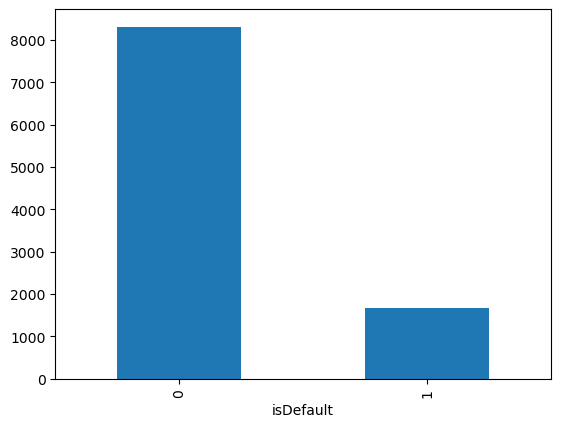

In [12]:
import matplotlib.pyplot as plt
print(data['isDefault'].unique())
data_label_count = data.groupby('isDefault').count()['loan_id'].sort_values(ascending = False)
print(data_label_count)
data_label_count.plot.bar()
plt.show()

删除不用于分析的自变量

In [13]:
data=data.drop(['loan_id','user_id','class','employer_type','industry','work_year','use','issue_date','Year','class_G','employer_type_高等教育机构','industry_金融业','work_year_10+ years','use_13','Year_2018'],axis=1)
data.head()

,total_loan,year_of_loan,interest,monthly_payment,house_exist,debt_loan_ratio,del_in_18month,known_outstanding_loan,known_dero,pub_dero_bankrup,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,31818.18182,3,11.466,1174.91,0,2.430000,0,3,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,28000.00000,5,16.841,670.69,0,11.004545,1,3,0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,17272.72727,3,8.900,603.32,1,6.409091,0,5,0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,20000.00000,3,4.788,602.30,0,9.204545,0,3,0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,15272.72727,3,12.790,470.31,2,15.578182,0,15,0,0.0,...,0,0,0,0,0,0,0,0,1,0


剩余变量情况

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_loan                9993 non-null   float64
 1   year_of_loan              9993 non-null   int64  
 2   interest                  9993 non-null   float64
 3   monthly_payment           9993 non-null   float64
 4   house_exist               9993 non-null   int64  
 5   debt_loan_ratio           9993 non-null   float64
 6   del_in_18month            9993 non-null   int64  
 7   known_outstanding_loan    9993 non-null   int64  
 8   known_dero                9993 non-null   int64  
 9   pub_dero_bankrup          9993 non-null   float64
 10  early_return              9993 non-null   int64  
 11  early_return_amount       9993 non-null   int64  
 12  early_return_amount_3mon  9993 non-null   float64
 13  isDefault                 9993 non-null   int64  
 14  class_A 

### 2.7 切割数据集

In [15]:
from sklearn.model_selection import train_test_split
# Splitting into train and test sets
X = data.drop(['isDefault'], axis = 1)
y = data['isDefault']
# test_size = 0.2意为训练集占80%，测试集占20%，即将数据集按4:1的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 628,stratify=y)
print(len(X_train), len(X_test))

7994 1999


In [16]:
#标准化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.transform(X_test)

### 2.8 特征选择

### 2.8.1 SBS-KNN特征选择

In [17]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

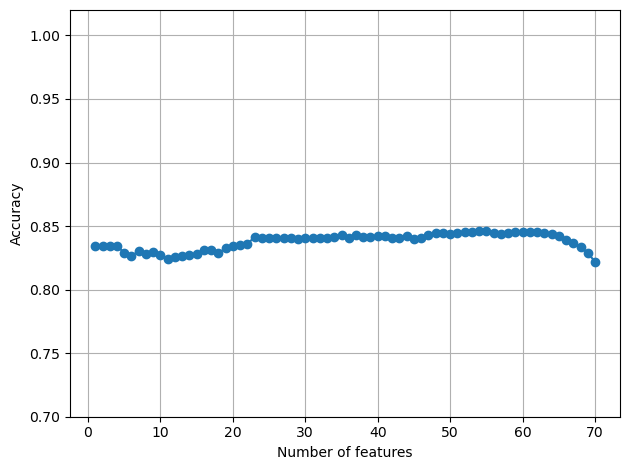

In [18]:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

#### 根据图片特征选择前23个自变量

In [19]:
k20 = list(sbs.subsets_[50])

selected_features_SBS=X_train.columns[k20].tolist()
print(selected_features_SBS)

['year_of_loan', 'monthly_payment', 'house_exist', 'pub_dero_bankrup', 'early_return', 'early_return_amount', 'class_C', 'class_D', 'employer_type_幼教与中小学校', 'employer_type_普通企业', 'industry_住宿和餐饮业', 'industry_文化和体育业', 'industry_电力、热力生产供应业', 'work_year_6 years', 'work_year_8 years', 'use_0', 'use_4', 'Year_2014', 'Year_2015', 'Year_2016']


### RFE特征选择


In [20]:
import warnings 
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier

feat_labels = data.drop(['isDefault'], axis = 1).columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) early_return_amount            0.128888
 2) interest                       0.084748
 3) debt_loan_ratio                0.074483
 4) monthly_payment                0.070369
 5) total_loan                     0.067031
 6) known_outstanding_loan         0.061947
 7) early_return                   0.061059
 8) early_return_amount_3mon       0.053172
 9) house_exist                    0.019613
10) del_in_18month                 0.016874
11) known_dero                     0.014872
12) employer_type_普通企业             0.012268
13) year_of_loan                   0.011487
14) Year_2016                      0.011155
15) use_0                          0.011069
16) Year_2015                      0.010840
17) employer_type_政府机构             0.010609
18) use_4                          0.009491
19) Year_2014                      0.009317
20) pub_dero_bankrup               0.009283
21) work_year_6 years              0.009019
22) class_A                        0.009018
23) industry_公共服务、社会组织          

#### 取前20的特征

In [21]:
selected_features_RFE=feat_labels[indices[0:20]].tolist()

In [22]:
print(list(set(selected_features_SBS)&set(selected_features_RFE)))

['use_4', 'monthly_payment', 'pub_dero_bankrup', 'employer_type_普通企业', 'Year_2014', 'early_return', 'house_exist', 'year_of_loan', 'Year_2016', 'use_0', 'Year_2015', 'early_return_amount']


In [23]:
# REF方法筛选特征
X_train_RFE=X_train[selected_features_RFE]
X_test_RFE=X_test[selected_features_RFE]
X_train_RFE_std=stdsc.fit_transform(X_train_RFE)
X_test_RFE_std=stdsc.transform(X_test_RFE)
# KNN方法筛选特征
X_train_SBS=X_train[selected_features_SBS]
X_test_SBS=X_test[selected_features_SBS]
X_train_SBS_std=stdsc.fit_transform(X_train_SBS)
X_test_SBS_std=stdsc.transform(X_test_SBS)

## 3.违约预测

### 3.1 逻辑回归

#### 模型构建&效果评价

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [27]:
from sklearn.linear_model import LogisticRegression
# Fitting a logistic regression model with default parameters
logreg_RFE1 = LogisticRegression()
logreg_RFE1.fit(X_train_RFE_std, y_train)
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg_RFE1.predict(X_test_RFE_std)
print("RFE筛选变量模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg_RFE1.predict_proba(X_test_RFE_std)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
RFE筛选变量模型效果：
Precision: 0.692 Recall: 0.247
F1 score: 0.364
AUC score: 0.874


In [30]:
from sklearn.linear_model import LogisticRegression
# Fitting a logistic regression model with default parameters
logreg_SBS = LogisticRegression()
logreg_SBS.fit(X_train_SBS_std, y_train)
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg_SBS.predict(X_test_SBS_std)
print("SBS筛选变量模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg_SBS.predict_proba(X_test_SBS_std)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
KNN筛选变量模型效果：
Precision: 0.581 Recall: 0.107
F1 score: 0.181
AUC score: 0.865


In [32]:
from sklearn.linear_model import LogisticRegression
# Fitting a logistic regression model with default parameters
logreg_RFE2 = LogisticRegression()
logreg_RFE2.fit(X_train_RFE, y_train)
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg_RFE2.predict(X_test_RFE)
print("RFE筛选变量（未标准化自变量）模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg_RFE2.predict_proba(X_test_RFE)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
RFE筛选变量（未标准化自变量）模型效果：
Precision: 0.575 Recall: 0.137
F1 score: 0.221
AUC score: 0.860


结果：RFE筛选的变量拟合效果较好，而且逻辑回归对于标准化过的自变量拟合效果更好

#### 解决样本不均衡

In [34]:
from sklearn.linear_model import LogisticRegression
# Fitting a logistic regression model with default parameters
logreg_RFE3 = LogisticRegression(class_weight = 'balanced')
logreg_RFE3.fit(X_train_RFE_std, y_train)
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg_RFE3.predict(X_test_RFE_std)
print("RFE筛选变量模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg_RFE3.predict_proba(X_test_RFE_std)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
RFE筛选变量模型效果：
Precision: 0.383 Recall: 0.926
F1 score: 0.542
AUC score: 0.872


### 3.2 朴素贝叶斯

#### 模型构建&效果评价

In [36]:
from sklearn.naive_bayes import BernoulliNB

In [37]:
clf_1 = BernoulliNB()
clf_1.fit(X_train, y_train)
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf_1.predict(X_test)
print("无筛选变量（未标准化自变量）模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf_1.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
无筛选变量（未标准化自变量）模型效果：
Precision: 0.450 Recall: 0.881
F1 score: 0.596
AUC score: 0.882


In [38]:
clf_1 = BernoulliNB()
clf_1.fit(X_train_std, y_train)
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf_1.predict(X_test_std)
print("无筛选变量（未标准化自变量）模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf_1.predict_proba(X_test_std)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
无筛选变量（未标准化自变量）模型效果：
Precision: 0.482 Recall: 0.625
F1 score: 0.544
AUC score: 0.861


In [39]:
clf_RFE1 = BernoulliNB()
clf_RFE1.fit(X_train_RFE_std, y_train)
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf_RFE1.predict(X_test_RFE_std)
print("RFE筛选变量模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf_RFE1.predict_proba(X_test_RFE_std)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
RFE筛选变量模型效果：
Precision: 0.466 Recall: 0.533
F1 score: 0.497
AUC score: 0.855


In [143]:
clf_SBS1 = BernoulliNB()
clf_SBS1.fit(X_train_SBS_std, y_train)
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf_SBS1.predict(X_test_SBS_std)
print("SBS筛选变量模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf_SBS1.predict_proba(X_test_SBS_std)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
SBS筛选变量模型效果：
Precision: 0.560 Recall: 0.208
F1 score: 0.304
AUC score: 0.839


In [144]:
clf_SBS2 = BernoulliNB()
clf_SBS2.fit(X_train_SBS, y_train)
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf_SBS2.predict(X_test_KNN)
print("SBS筛选变量（未标准化自变量）模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf_SBS2.predict_proba(X_test_SBS)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
SBS筛选变量（未标准化自变量）模型效果：
Precision: 0.432 Recall: 0.842
F1 score: 0.571
AUC score: 0.858


结论：未标准化未筛选自变量的贝叶斯模型拟合效果更优，KNN和RFE筛选变量拟合结果相似

### 3.3 决策树模型

#### 模型构建&效果评估

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
# 信息增益判断不纯度
for i in range(2,15):
    dt = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=i)
    print("当决策树最大层数为{}时".format(i))
    dt.fit(X_train, y_train)
# Prediction & Evaluation
    print("Decision tree score for test set:")
# Precision, Recall, F1-score
    y_hat_test = dt.predict(X_test)
    print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test))) 
    print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
    y_hat_test = dt.predict_proba(X_test)
    print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

当决策树最大层数为2时
Decision tree score for test set:
Precision: 0.000 Recall: 0.000
F1 score: 0.000
AUC score: 0.861
当决策树最大层数为3时
Decision tree score for test set:
Precision: 0.603 Recall: 0.435
F1 score: 0.505
AUC score: 0.877
当决策树最大层数为4时
Decision tree score for test set:
Precision: 0.603 Recall: 0.435
F1 score: 0.505
AUC score: 0.884
当决策树最大层数为5时
Decision tree score for test set:
Precision: 0.610 Recall: 0.420
F1 score: 0.497
AUC score: 0.883
当决策树最大层数为6时
Decision tree score for test set:
Precision: 0.596 Recall: 0.399
F1 score: 0.478
AUC score: 0.878
当决策树最大层数为7时
Decision tree score for test set:
Precision: 0.577 Recall: 0.435
F1 score: 0.496
AUC score: 0.871
当决策树最大层数为8时
Decision tree score for test set:
Precision: 0.565 Recall: 0.426
F1 score: 0.486
AUC score: 0.855
当决策树最大层数为9时
Decision tree score for test set:
Precision: 0.540 Recall: 0.363
F1 score: 0.434
AUC score: 0.845
当决策树最大层数为10时
Decision tree score for test set:
Precision: 0.520 Recall: 0.387
F1 score: 0.444
AUC score: 0.838
当决策树最大层数为

In [148]:
# 默认gini系数
for i in range(2,15):
    dt = DecisionTreeClassifier(splitter='best',max_depth=i)
    print("当决策树最大层数为{}时".format(i))
    dt.fit(X_train, y_train)
# Prediction & Evaluation
    print("Decision tree score for test set:")
# Precision, Recall, F1-score
    y_hat_test = dt.predict(X_test)
    print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test))) 
    print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
    y_hat_test = dt.predict_proba(X_test)
    print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

当决策树最大层数为2时
Decision tree score for test set:
Precision: 0.000 Recall: 0.000
F1 score: 0.000
AUC score: 0.861
当决策树最大层数为3时
Decision tree score for test set:
Precision: 0.603 Recall: 0.435
F1 score: 0.505
AUC score: 0.877
当决策树最大层数为4时
Decision tree score for test set:
Precision: 0.598 Recall: 0.438
F1 score: 0.505
AUC score: 0.878
当决策树最大层数为5时
Decision tree score for test set:
Precision: 0.588 Recall: 0.426
F1 score: 0.494
AUC score: 0.880
当决策树最大层数为6时
Decision tree score for test set:
Precision: 0.592 Recall: 0.402
F1 score: 0.479
AUC score: 0.875
当决策树最大层数为7时
Decision tree score for test set:
Precision: 0.592 Recall: 0.461
F1 score: 0.518
AUC score: 0.883
当决策树最大层数为8时
Decision tree score for test set:
Precision: 0.587 Recall: 0.452
F1 score: 0.511
AUC score: 0.875
当决策树最大层数为9时
Decision tree score for test set:
Precision: 0.565 Recall: 0.390
F1 score: 0.461
AUC score: 0.863
当决策树最大层数为10时
Decision tree score for test set:
Precision: 0.540 Recall: 0.405
F1 score: 0.463
AUC score: 0.840
当决策树最大层数为

由此可见，决策数层数为4时，拟合效果最好

注：由于RFE筛选原理即为决策树，故没有用RFE筛选数据重复做测试；而决策树分类结果和自变量标准化无关，也没有进行多余测试

In [142]:
clf_RFE2 = BernoulliNB()
clf_RFE2.fit(X_train_RFE, y_train)
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf_RFE2.predict(X_test_RFE)
print("RFE筛选变量(未标准化自变量）模型效果：")
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf_RFE.predict_proba(X_test_RFE)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
RFE筛选变量(未标准化自变量）模型效果：
Precision: 0.414 Recall: 0.932
F1 score: 0.573
AUC score: 0.851


结论：使用信息增益判断不纯度，模型拟合在n=4时拟合效果最好